# Predicting  Airline passenger satisfaction 

## Problem definition

> Measuring customer satisfaction is a key element for modern businesses as it can significantly contribute to a continuing effort of service quality improvement. In order to meet customer expectations and achieve higher quality levels, airlines need to develop a specific mechanism of passenger satisfaction measurement.

## Data 

The Data downloaded from Kaggle: https://www.kaggle.com/binaryjoker/airline-passenger-satisfaction

## Preparing the tools

In [1]:
# Import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Import models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

!wget https://raw.githubusercontent.com/Azamat0315277/Helper_functions/main/helper_functions.py
from helper_functions import unzip_data

--2021-11-10 16:33:05--  https://raw.githubusercontent.com/Azamat0315277/Helper_functions/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-10 16:33:06 (74.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Load Data

In [2]:
!wget https://github.com/Azamat0315277/Helper_functions/blob/main/airline_passenger_satisfaction.csv

--2021-11-10 16:33:08--  https://github.com/Azamat0315277/Helper_functions/blob/main/airline_passenger_satisfaction.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘airline_passenger_satisfaction.csv’

airline_passenger_s     [ <=>                ] 133.18K  --.-KB/s    in 0.08s   

2021-11-10 16:33:09 (1.72 MB/s) - ‘airline_passenger_satisfaction.csv’ saved [136377]



In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data/airline_passenger_satisfaction.csv")

In [4]:
df.shape

(129880, 24)

In [5]:
df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
# Find out how many in each class
df["satisfaction"].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [8]:
df.isna().sum()

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [9]:
pd.crosstab(df["satisfaction"], df["type_of_travel"])

type_of_travel,Business travel,Personal Travel
satisfaction,,
neutral or dissatisfied,37337,36115
satisfied,52356,4072


### Preprocessing data

In [10]:
df.satisfaction.replace(("satisfied", 'neutral or dissatisfied'), (1,0), inplace=True)



In [11]:
# Turn into category
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [12]:
df.Gender.replace(("Male", "Female"), (1, 0), inplace=True)
df.customer_type.replace(("Loyal Customer", "disloyal Customer"), (1,0), inplace=True)
df.type_of_travel.replace(("Personal Travel", "Business travel"), (1, 2), inplace=True)




In [13]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [14]:
df.customer_class.replace(("Eco", "Eco Plus", "Business"), (1, 2, 3), inplace=True)

In [15]:
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,1,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,2,3,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,2,3,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,2,3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,2,3,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,34,2,3,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
129876,1,1,23,2,3,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
129877,0,1,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
129878,1,1,14,2,3,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


### Looking for relations between labels

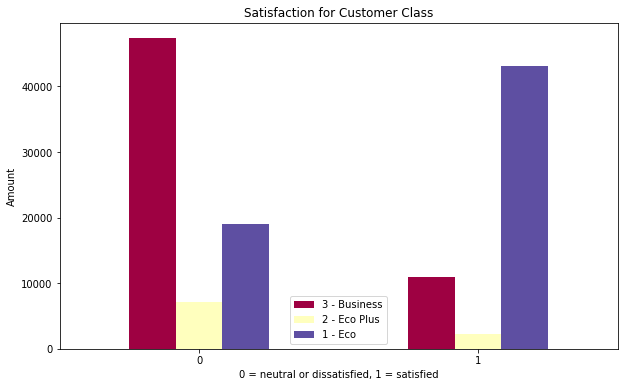

In [16]:
pd.crosstab(df["satisfaction"], df["customer_class"]).plot(kind='bar',
                                   figsize=(10,6),
                                   cmap="Spectral");
plt.title('Satisfaction for Customer Class')
plt.xlabel('0 = neutral or dissatisfied, 1 = satisfied')
plt.ylabel("Amount")
plt.legend(['3 - Business','2 - Eco Plus', '1 - Eco']);
plt.xticks(rotation=0);


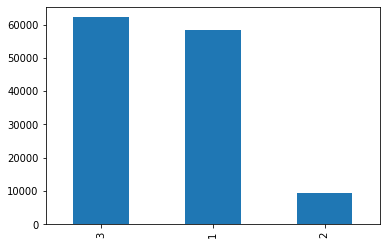

In [17]:
df["customer_class"].value_counts().plot.bar()

In [18]:
df.columns

Index(['Gender', 'customer_type', 'age', 'type_of_travel', 'customer_class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

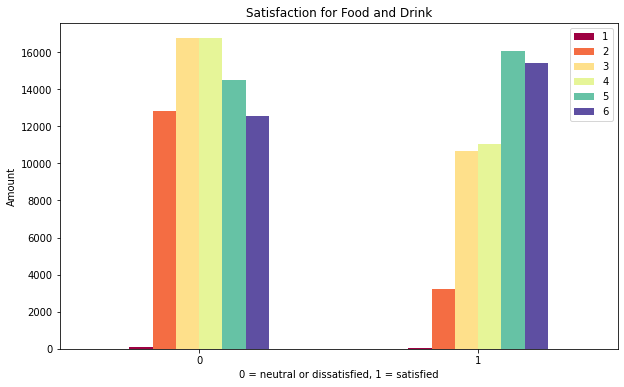

In [19]:
# Create a plot of crosstab
pd.crosstab(df["satisfaction"], df["food_and_drink"]).plot(kind='bar',
                                   figsize=(10,6),
                                   cmap="Spectral");
plt.title('Satisfaction for Food and Drink')
plt.xlabel('0 = neutral or dissatisfied, 1 = satisfied')
plt.ylabel("Amount")
plt.legend(['1','2', '3', '4', '5', '6']);
plt.xticks(rotation=0);

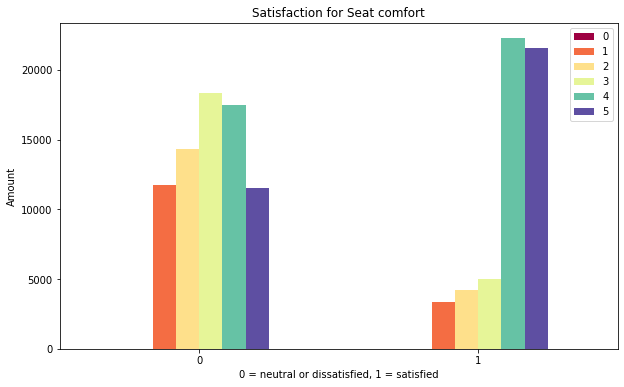

In [20]:
# Create a plot of crosstab
pd.crosstab(df["satisfaction"], df["seat_comfort"]).plot(kind='bar',
                                   figsize=(10,6),
                                   cmap="Spectral");
plt.title('Satisfaction for Seat comfort')
plt.xlabel('0 = neutral or dissatisfied, 1 = satisfied')
plt.ylabel("Amount")
plt.legend(['0','1','2', '3', '4', '5']);
plt.xticks(rotation=0);

In [21]:
df["inflight_entertainment"].value_counts()

4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: inflight_entertainment, dtype: int64

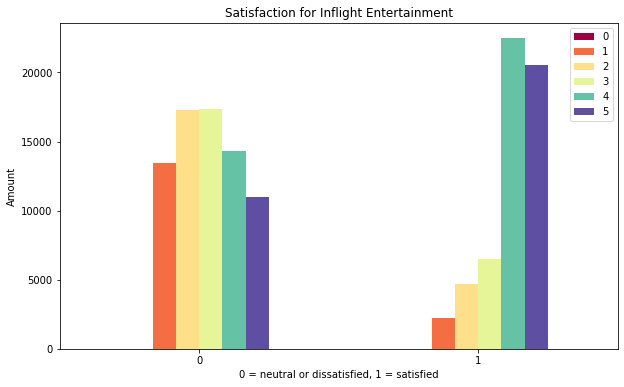

In [22]:
# Create a plot of crosstab
pd.crosstab(df["satisfaction"], df["inflight_entertainment"]).plot(kind='bar',
                                   figsize=(10,6),
                                   cmap="Spectral");
plt.title('Satisfaction for Inflight Entertainment')
plt.xlabel('0 = neutral or dissatisfied, 1 = satisfied')
plt.ylabel("Amount")
plt.legend(['0','1','2', '3', '4', '5']);
plt.xticks(rotation=0);

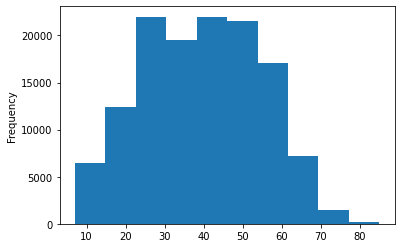

In [23]:
df["age"].plot.hist(bins=10);

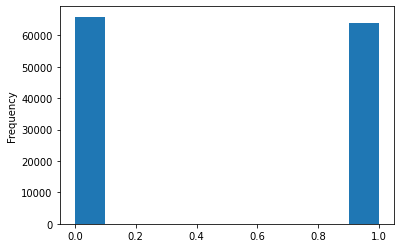

In [24]:
df["Gender"].plot.hist(bins=10);

In [25]:
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,1,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,2,3,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,2,3,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,2,3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,2,3,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,34,2,3,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
129876,1,1,23,2,3,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
129877,0,1,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
129878,1,1,14,2,3,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


In [26]:
df.isna().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

## Fill missing values


In [27]:
# Check for columns which have null values
for label, content in df.items(): 
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

arrival_delay_in_minutes


In [28]:
# Fill numeric rows with the median
for label, content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add binary column which tell if the data was missing or not
      df[label + "is_missing"] = pd.isnull(content)
      # Fill missing numeric values with median
      df[label] = content.fillna(content.median())

In [29]:
# Check to see how many examples were missing
for label, content in df.items():  
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [30]:
df.isna().sum()

Gender                                0
customer_type                         0
age                                   0
type_of_travel                        0
customer_class                        0
flight_distance                       0
inflight_wifi_service                 0
departure_arrival_time_convenient     0
ease_of_online_booking                0
gate_location                         0
food_and_drink                        0
online_boarding                       0
seat_comfort                          0
inflight_entertainment                0
onboard_service                       0
leg_room_service                      0
baggage_handling                      0
checkin_service                       0
inflight_service                      0
cleanliness                           0
departure_delay_in_minutes            0
arrival_delay_in_minutes              0
satisfaction                          0
arrival_delay_in_minutesis_missing    0
dtype: int64

In [31]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,arrival_delay_in_minutesis_missing
0,1,1,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,False
1,1,0,25,2,3,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,False
2,0,1,26,2,3,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,False
3,0,1,25,2,3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,False
4,1,1,61,2,3,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,False


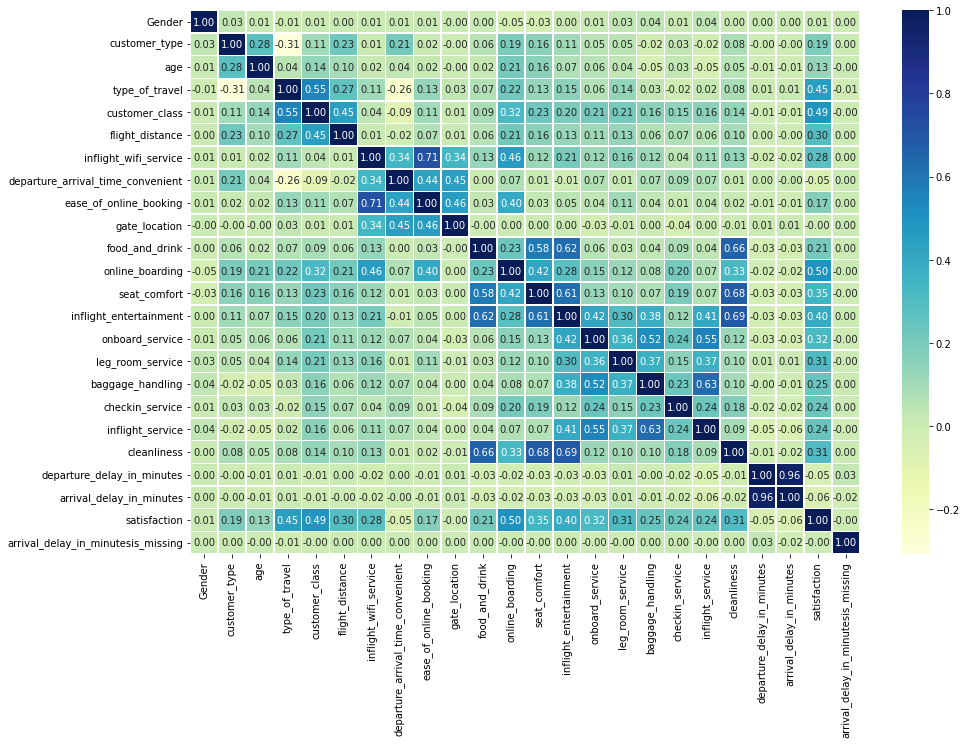

In [32]:
# let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');

## Modelling

In [33]:
# Split data into X and y 
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [34]:
# Split data into train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
len(X_train), len(X_test), len(y_train), len(y_test)

(103904, 25976, 103904, 25976)

I'm going to use 3 models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [36]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and eveluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models 
    X_train: training data (n labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [37]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.7552356020942408,
 'Logistic Regression': 0.7652448413920542,
 'Random Forest': 0.9608869725900832}

## Model Comparison

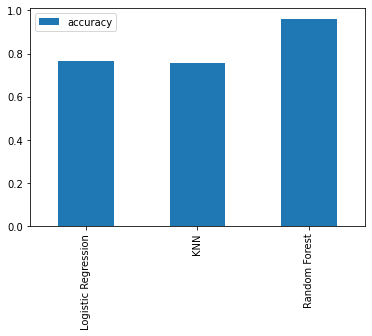

In [38]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

RandomForestClassifier is better than others

I use RandomForestClassifier

## Hyperparams tuning with RandomizedSearchCV


In [39]:
# Create hyperparams grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 100, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [40]:
np.random.seed(42)

# Setup hyperparams for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [41]:
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 60}

In [42]:
rs_rf.score(X_test, y_test)

0.95903911302741

In [43]:
model_scores

{'KNN': 0.7552356020942408,
 'Logistic Regression': 0.7652448413920542,
 'Random Forest': 0.9608869725900832}

## Hyperparams tune with GridSearchCV

In [48]:
gs_rf_grid = {'max_depth': [None],
              'min_samples_leaf': [5],
              'min_samples_split': [4],
              'n_estimators': [60,100],
              'max_features': ['auto', 'sqrt']}

# Setup hyperparams
np.random.seed(42)
gs_rf_cv = GridSearchCV(RandomForestClassifier(),
                        param_grid=gs_rf_grid,
                        cv=5,
                        verbose=True,
                        n_jobs=-1)
# Fit 
gs_rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [49]:
gs_rf_cv.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 60}

## Evaluate model

In [50]:
gs_rf_cv.score(X_test, y_test)

0.9595780720665229

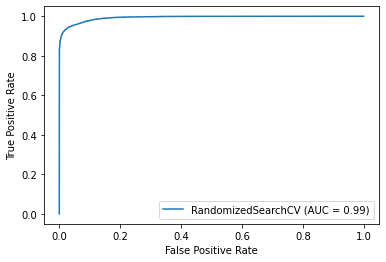

In [52]:
# PLot ROC  curve and calculate AUC metric
plot_roc_curve(rs_rf, X_test, y_test)

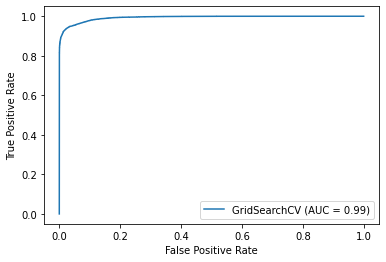

In [53]:
# PLot ROC  curve and calculate AUC metric
plot_roc_curve(gs_rf_cv, X_test, y_test)

In [54]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)

In [55]:
y_preds

array([0, 1, 0, ..., 1, 1, 0])

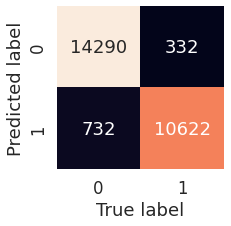

In [57]:
# Visualization confusion matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    
    """
    Plots confusion matrix using Seaborn's heatmap()
    
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False,
                     fmt=".0f")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
                  
plot_conf_mat(y_test,y_preds)

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14622
           1       0.97      0.94      0.95     11354

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## Calculate evaluation metrics using cross validation

* Accuracy
* Precision
* Recall
* F1-score

In [59]:
# Check best params
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 60}

In [60]:
# Create a new classifier with best params
model = RandomForestClassifier(max_depth=None,
                               min_samples_leaf=5,
                               min_samples_split=4,
                               n_estimators=60)

In [61]:
# Cross validated accuracy
cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.95749923, 0.96004004, 0.9591546 , 0.96111796, 0.96027102])

In [62]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9596165691407453

In [63]:
# Cross-validated precision
cv_prec = cross_val_score(model, X, y, cv=5, scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.9685871593054255

In [64]:
cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9377436515659122

In [65]:
cv_f1 = cross_val_score(model, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.953194604759072

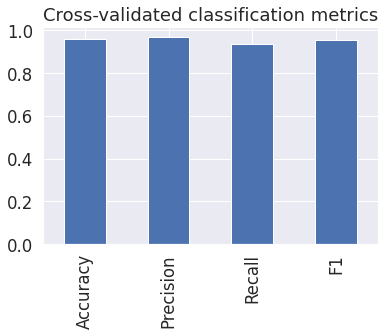

In [66]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                            index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                       legend=False);


## Feature importance

In [67]:
# Fait the model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
model.score(X_test, y_test)

0.9597320603634124

In [69]:
# Check feature importance
model.feature_importances_

array([3.10733535e-03, 3.78398954e-02, 2.32954510e-02, 9.78559650e-02,
       1.40097873e-01, 2.50080914e-02, 1.53501563e-01, 1.45483792e-02,
       4.00162760e-02, 1.05194926e-02, 9.34142293e-03, 1.63088974e-01,
       5.36378369e-02, 5.12077331e-02, 2.80576160e-02, 4.19974256e-02,
       2.20351818e-02, 2.02952862e-02, 2.66703327e-02, 2.48974783e-02,
       5.65232395e-03, 7.32443323e-03, 3.63320527e-06])

In [71]:
# Match feature importance to columns
feature_dict = dict(zip(df.columns, list(model.feature_importances_)))
feature_dict

{'Gender': 0.003107335353531056,
 'age': 0.023295451033009774,
 'arrival_delay_in_minutes': 0.007324433230132438,
 'baggage_handling': 0.022035181816610783,
 'checkin_service': 0.020295286165726525,
 'cleanliness': 0.02489747829405646,
 'customer_class': 0.14009787321707576,
 'customer_type': 0.03783989543891105,
 'departure_arrival_time_convenient': 0.014548379153329405,
 'departure_delay_in_minutes': 0.005652323948204821,
 'ease_of_online_booking': 0.040016276044202936,
 'flight_distance': 0.025008091412662945,
 'food_and_drink': 0.009341422928036492,
 'gate_location': 0.010519492563914403,
 'inflight_entertainment': 0.051207733106403044,
 'inflight_service': 0.0266703327136291,
 'inflight_wifi_service': 0.15350156271541135,
 'leg_room_service': 0.041997425645249664,
 'onboard_service': 0.028057615960875568,
 'online_boarding': 0.16308897417175663,
 'satisfaction': 3.6332052678742417e-06,
 'seat_comfort': 0.05363783691329352,
 'type_of_travel': 0.09785596496870858}

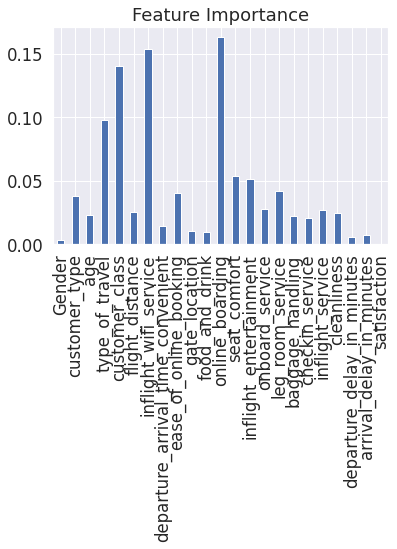

In [74]:
# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## Predicting

In [78]:
test_preds = model.predict(X)

In [79]:
len(test_preds)

129880

In [77]:
df["satisfaction"].value_counts()

0    73452
1    56428
Name: satisfaction, dtype: int64

In [84]:
df_preds = pd.DataFrame()
df_preds["satisfaction"] = list(test_preds)
df_preds.head()

,satisfaction
0,0
1,0
2,1
3,0
4,1


In [85]:
df_preds["satisfaction"].value_counts()

0    75257
1    54623
Name: satisfaction, dtype: int64

In [86]:
df_preds.satisfaction.replace((1,0), ("satisfied", "neutral or dissatisfied"), inplace=True)




In [87]:
df_preds

,satisfaction
0,neutral or dissatisfied
1,neutral or dissatisfied
2,satisfied
3,neutral or dissatisfied
4,satisfied
...,...
129875,neutral or dissatisfied
129876,satisfied
129877,neutral or dissatisfied
129878,satisfied


In [88]:
df_preds.to_csv("Airline_Satisfaction_preds.csv", index=False)